
기술 통계:
               인구 (명)     면적 (㎢)          인구밀도        평균소득월액        주점개수   
count      25.000000  25.000000     25.000000  2.500000e+01   25.000000  \
mean   396443.520000  24.209600  17230.880000  1.417313e+06  141.800000   
std    126718.526659   9.310719   4751.005475  9.222396e+04   84.440808   
min    134635.000000   9.960000   6649.000000  1.298784e+06   54.000000   
25%    322952.000000  17.410000  14140.000000  1.358067e+06   73.000000   
50%    401572.000000  23.600000  17241.000000  1.397704e+06  108.000000   
75%    463998.000000  29.570000  19896.000000  1.451062e+06  203.000000   
max    673926.000000  46.980000  26301.000000  1.670051e+06  338.000000   

       전혀 느끼지 않았다 (%)  느끼지 않은 편이다 (%)   보통이다 (%)  느낀 편이다 (%)  매우 많이 느꼈다 (%)   
count       25.000000       25.000000  25.000000   25.000000      25.000000  \
mean         1.544000       21.304000  33.320000   35.528000       8.296000   
std          0.865583        4.987608   6.139218    4.880191       1.444957   

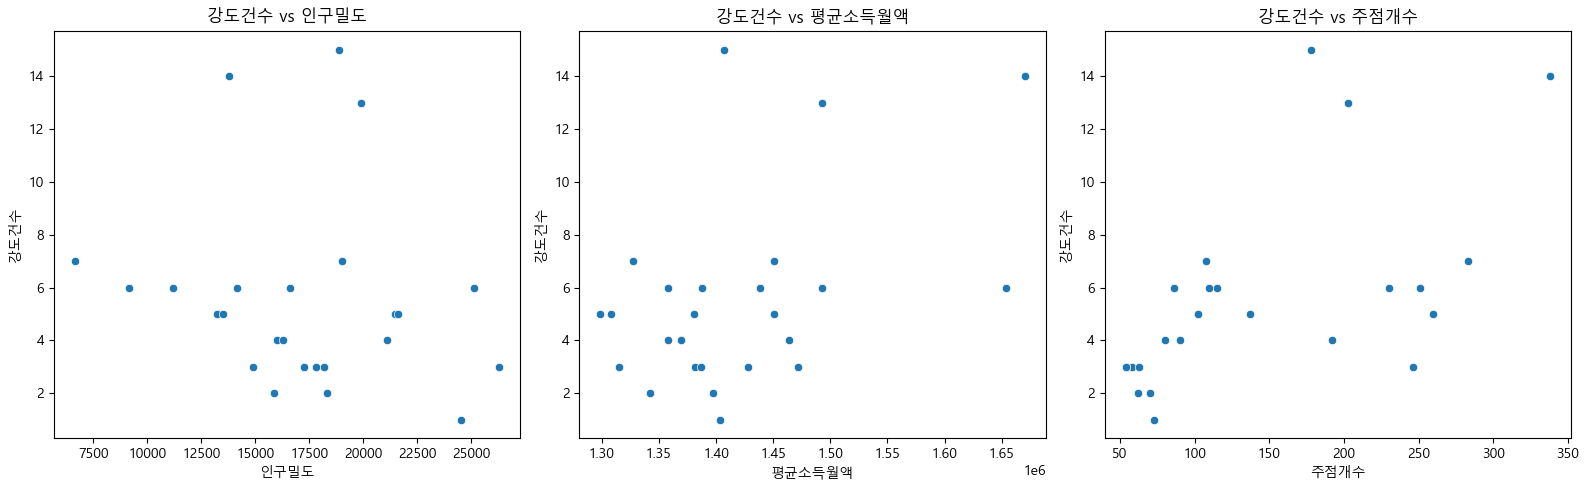


상관계수 행렬:
             강도건수      인구밀도    평균소득월액      주점개수
강도건수    1.000000 -0.165555  0.442666  0.575070
인구밀도   -0.165555  1.000000 -0.375473 -0.429193
평균소득월액  0.442666 -0.375473  1.000000  0.276436
주점개수    0.575070 -0.429193  0.276436  1.000000


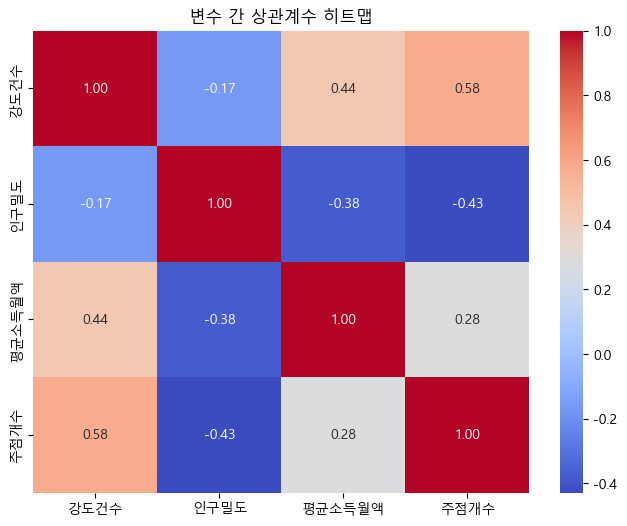


인구밀도와 강도건수의 상관계수: -0.17, p-value: 0.4290
-> 인구밀도는 강도건수와 통계적으로 유의미하지 않은 상관관계입니다.

평균소득월액와 강도건수의 상관계수: 0.44, p-value: 0.0267
-> 평균소득월액는 강도건수와 통계적으로 유의미한 상관관계가 있습니다.

주점개수와 강도건수의 상관계수: 0.58, p-value: 0.0026
-> 주점개수는 강도건수와 통계적으로 유의미한 상관관계가 있습니다.


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
# 1. 데이터 불러오기
file_path = "./서울_통합_2020.csv"  # CSV 파일 경로
data = pd.read_csv(file_path, encoding='utf-8')

# 2. 기술 통계
print("\n기술 통계:\n", data.describe())

# 3. 산점도 시각화
# 강도 건수와 다른 변수 간의 관계 시각화
plt.figure(figsize=(16, 5))

variables = ["인구밀도", "평균소득월액", "주점개수"]
for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=data[var], y=data["강도건수"])
    plt.title(f"강도건수 vs {var}")
    plt.xlabel(var)
    plt.ylabel("강도건수")

plt.tight_layout()
plt.show()

# 4. 상관계수 계산
correlation_matrix = data[["강도건수", "인구밀도", "평균소득월액", "주점개수"]].corr()

print("\n상관계수 행렬:\n", correlation_matrix)

# 5. 상관계수 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("변수 간 상관계수 히트맵")
plt.show()

# 6. 상관계수의 유의성 검정 (피어슨 상관계수)
for var in variables:
    corr, p_value = stats.pearsonr(data[var], data["강도건수"])
    print(f"\n{var}와 강도건수의 상관계수: {corr:.2f}, p-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"-> {var}는 강도건수와 통계적으로 유의미한 상관관계가 있습니다.")
    else:
        print(f"-> {var}는 강도건수와 통계적으로 유의미하지 않은 상관관계입니다.")


In [7]:
!pip install statsmodels

  Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl (9.8 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 MB 187.9 kB/s eta 0:03:57
   ---------------------------------------- 0.0/44.5 MB 187.9 kB/s eta 0:03:57
   ---------------------------------------- 0.1/44.5 MB 273.8 kB/s eta 0:02:43
   ---------------------------------------- 0.1/44.5 MB 481.4 kB/s eta 0:01:

ERROR: Could not install packages due to an OSError: [WinError 32] 다른 프로세스가 파일을 사용 중이기 때문에 프로세스가 액세스 할 수 없습니다: 'C:\\Python312\\Lib\\site-packages\\patsy\\compat_ordereddict.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


In [1]:
import statsmodels.api as sm

# 1. 피어슨 상관계수 및 유의성 검정
significant_vars = []  # 유의미한 변수 저장 리스트

print("\n상관계수 및 p-value:")
for var in variables:
    corr, p_value = stats.pearsonr(data[var], data["강도건수"])
    print(f"{var}와 강도건수: 상관계수={corr:.2f}, p-value={p_value:.4f}")
    if p_value < 0.05:
        significant_vars.append(var)
        print(f"-> {var}는 유의미한 변수로 선택됩니다.")
    else:
        print(f"-> {var}는 제외됩니다.")

# 2. 유의미한 변수 확인
print("\n회귀 분석에 포함될 변수:", significant_vars)

# 3. 회귀 분석 준비
if significant_vars:
    X = data[significant_vars]  # 유의미한 변수만 독립변수로 선택
    y = data["강도건수"]

    # 상수항 추가 (Intercept)
    X = sm.add_constant(X)

    # 4. 회귀 분석 모델 적합
    model = sm.OLS(y, X).fit()

    # 5. 결과 요약 출력
    print("\n회귀 분석 결과:")
    print(model.summary())
else:
    print("\n유의미한 변수가 없으므로 회귀 분석을 수행하지 않습니다.")


ModuleNotFoundError: No module named 'statsmodels'